In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./ppo/log_test.txt", delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6
0,0,-546.777693,-117.208268,-51.393779,-38.558472,-7.648413,-2.495625
1,500,-27.120599,-12.813478,-2.836412,-0.748018,-0.237742,0.000600
2,1000,-14.454672,-0.655301,-0.394266,0.000600,0.000600,0.000600
3,1500,-49.443789,-1.680951,-1.066616,-0.220718,0.000600,0.000600
4,2000,-181.472727,-2.198400,-2.960188,-0.412527,0.000600,0.000600


In [4]:
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

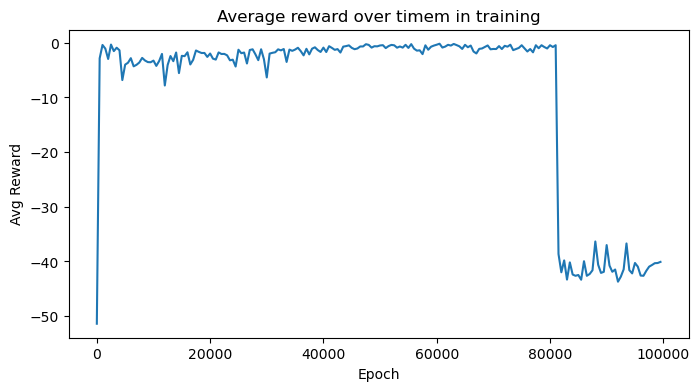

In [5]:
import matplotlib.pyplot as plt

# Set the dimensions of the plot
plt.figure(figsize=(8, 4))  # Width=8 inches, Height=4 inches

# Create a line plot
plt.plot(df[0][:200], df[3][:200])

# Adding title and labels
plt.title('Average reward over timem in training')
plt.xlabel('Epoch')
plt.ylabel('Avg Reward')

# Show the plot
plt.savefig("reward_over_time.png", dpi=600)
plt.show()